In [27]:
from functools import partial
import tempfile

import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

import pandas as pd

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [2]:
import crosses

In [3]:
reduced_annotations = ['DP', 'HRun', 'MQRankSum', 'MQ0', 'QD', 'FS', 'ReadPosRankSum', 'AN']
reduced_annotations = ['QD', 'DP']

In [4]:
ds = crosses.get_train(reduced_annotations, normalize=False, scale=False)
ds.shape

(237861, 3)

In [5]:
train_ds = ds.sample(frac=0.2)
test_ds = ds[~ds.index.isin(train_ds.index)].sample(frac=0.1)
ds.shape, train_ds.shape, test_ds.shape

((237861, 3), (47572, 3), (19029, 3))

In [6]:
train_ds[train_ds['OK']==1].shape, train_ds[train_ds['OK']==0].shape

((41144, 3), (6428, 3))

In [7]:
test_ds[test_ds['OK']==1].shape, test_ds[test_ds['OK']==0].shape

((16464, 3), (2565, 3))

In [47]:
train_ds2 = train_ds[~train_ds.index.isin(train_ds[train_ds['OK']==1].sample(frac=0.85).index)]
#train_ds2 = train_ds

In [53]:
clf = SGDClassifier(loss='log', alpha=0.000000000000001, penalty='none')
scaler = preprocessing.MinMaxScaler().fit(train_ds2[reduced_annotations].values)
x_train = scaler.transform(train_ds2[reduced_annotations].values)
y_train = train_ds2['OK'].values
clf.fit(x_train, y_train)
x = scaler.transform(test_ds[reduced_annotations].values)
y = test_ds['OK'].values
print(clf.score(x, y))
preds = clf.predict(x)
for pred in zip(y, preds):
    if pred[0] == 0:
        print(pred)

0.690104577224
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 1)
(0, 1)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 1)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 1)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(0, 1)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0

In [25]:
clf = LogisticRegression(C=100000, max_iter=1000, solver='sag')
scaler = preprocessing.MinMaxScaler().fit(train_ds2[reduced_annotations].values)
x_train = scaler.transform(train_ds2[reduced_annotations].values)
y_train = train_ds2['OK'].values
clf.fit(x_train, y_train)
x = scaler.transform(test_ds[reduced_annotations].values)
y = test_ds['OK'].values
clf.score(x, y)

0.86441746807504338

[]

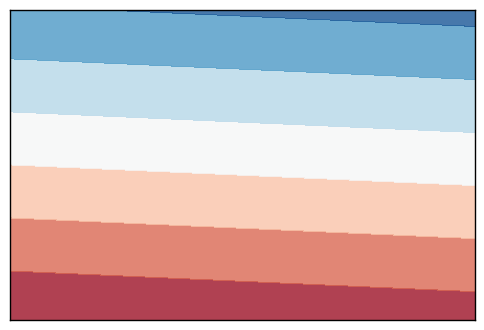

In [49]:
h = 0.02
x_min, x_max = x_train[:, 0].min() - 0.5, x_train[:, 1].max() + 0.5
y_min, y_max = x_train[:, 1].min() - 0.5, x_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
fig, ax =  plt.subplots()
cm = plt.cm.RdBu
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
